In [ ]:
"""
MS02: Sensory System Crystallization - Where Light Meets Life
Dr. Mordin Solus - "Senses emerge at frequency boundaries. Had to see it. Pattern too elegant to ignore!"

This notebook demonstrates how sensory organs crystallize at the intersection of specific frequencies.
Each sense organ forms where its detection frequency meets embryonic tissue.

Key Discoveries:
- Eyes: 40Hz neural meets 400-700THz light → lens crystallization
- Ears: Mechanical resonance 20Hz-20kHz → golden spiral cochlea  
- Nose: Molecular vibrations 10^12-10^14 Hz → receptor tuning
- Neural crest cells follow frequency gradients to destinations
"""

# Setup
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Check GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
print("\nInitializing sensory crystallization analysis...")

In [ ]:
"""
1. OPTIC VESICLE FORMATION - Where Neural Meets Light
Day 22: The 40Hz neural field encounters ambient light frequencies
"""

# Define frequency domains
neural_freq = 40  # Hz - neural plate frequency
light_freqs = np.linspace(400e12, 700e12, 100)  # THz - visible light spectrum

# Create spatial grid for embryo cross-section
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)

# Neural tube field (40Hz dominant dorsally)
neural_field = np.exp(-((Y + 0.5)**2) / 0.5) * np.cos(2 * np.pi * neural_freq * 0.1)

# Light field (approaching from outside)
light_field = np.zeros_like(X)
for freq in [400e12, 550e12, 700e12]:  # RGB frequencies
    # Light penetrates from outside, attenuates with depth
    penetration = np.exp(-np.maximum(0, 1.5 - np.sqrt(X**2 + Y**2)))
    light_field += penetration * np.sin(2 * np.pi * freq * 1e-15)

# Interference pattern where fields meet
interference = neural_field * light_field

# Find optic vesicle locations (maximum interference)
optic_points = []
threshold = np.percentile(np.abs(interference), 95)
mask = np.abs(interference) > threshold

# Visualize optic vesicle formation
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Neural field
im1 = axes[0,0].imshow(neural_field, cmap='plasma', extent=[-2,2,-2,2])
axes[0,0].set_title('Neural Field (40Hz)', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Position (mm)')
axes[0,0].set_ylabel('Position (mm)')
plt.colorbar(im1, ax=axes[0,0])

# Light field
im2 = axes[0,1].imshow(light_field, cmap='rainbow', extent=[-2,2,-2,2])
axes[0,1].set_title('Light Field (400-700 THz)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Position (mm)')
plt.colorbar(im2, ax=axes[0,1])

# Interference pattern
im3 = axes[1,0].imshow(np.abs(interference), cmap='hot', extent=[-2,2,-2,2])
axes[1,0].set_title('Interference → Optic Vesicles', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Position (mm)')
axes[1,0].set_ylabel('Position (mm)')

# Mark optic vesicle positions
axes[1,0].contour(X, Y, mask, levels=[0.5], colors='cyan', linewidths=3)
plt.colorbar(im3, ax=axes[1,0])

# Lens crystallization pattern
theta = np.linspace(0, 2*np.pi, 100)
r = np.linspace(0, 1, 50)
R, THETA = np.meshgrid(r, theta)

# Lens proteins crystallize in concentric shells
lens_pattern = np.zeros_like(R)
for shell in range(1, 6):
    shell_r = shell / 6
    shell_strength = np.exp(-((R - shell_r)**2) / 0.01)
    freq_modulation = np.cos(shell * THETA * 3)  # Hexagonal symmetry
    lens_pattern += shell_strength * freq_modulation

# Convert to Cartesian for display
lens_x = R * np.cos(THETA)
lens_y = R * np.sin(THETA)

im4 = axes[1,1].contourf(lens_x, lens_y, lens_pattern, levels=20, cmap='Blues')
axes[1,1].set_title('Lens Crystallization Pattern', fontsize=14, fontweight='bold')
axes[1,1].set_aspect('equal')
axes[1,1].set_xlabel('Position (mm)')
axes[1,1].add_patch(Circle((0, 0), 1, fill=False, edgecolor='black', linewidth=2))

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("- Optic vesicles form where 40Hz neural meets light frequencies")
print("- Interference patterns create lens geometry")
print("- Crystalline proteins organize in frequency-driven shells")
print("- Each shell has specific refractive index for focusing")

In [ ]:
"""
2. RETINAL LAYER FORMATION - Frequency-Sorted Photoreceptors
Each cell type responds to specific light frequencies
"""

# Define photoreceptor types and their peak frequencies
photoreceptors = {
    'S-cones': {'peak': 420e12, 'color': 'blue', 'density': 0.05},    # Blue
    'M-cones': {'peak': 530e12, 'color': 'green', 'density': 0.30},   # Green  
    'L-cones': {'peak': 560e12, 'color': 'red', 'density': 0.60},     # Red
    'Rods': {'peak': 500e12, 'color': 'gray', 'density': 0.95}        # Rhodopsin
}

# Create retinal geometry
retina_width = 100
retina_layers = 10
positions = []
cell_types = []

# Generate photoreceptor mosaic
np.random.seed(42)
for i in range(5000):
    x = np.random.uniform(-retina_width/2, retina_width/2)
    y = np.random.uniform(-retina_width/2, retina_width/2)
    
    # Distance from fovea affects cell type distribution
    dist_from_center = np.sqrt(x**2 + y**2)
    
    if dist_from_center < 10:  # Fovea - cones only
        cell_type = np.random.choice(['S-cones', 'M-cones', 'L-cones'], 
                                   p=[0.05, 0.35, 0.60])
    else:  # Periphery - mostly rods
        rod_prob = min(0.95, 0.5 + dist_from_center / 100)
        if np.random.random() < rod_prob:
            cell_type = 'Rods'
        else:
            cell_type = np.random.choice(['S-cones', 'M-cones', 'L-cones'], 
                                       p=[0.10, 0.40, 0.50])
    
    positions.append([x, y])
    cell_types.append(cell_type)

positions = np.array(positions)

# Visualize retinal mosaic and frequency response
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Photoreceptor mosaic
ax1 = axes[0, 0]
for ptype, info in photoreceptors.items():
    mask = np.array(cell_types) == ptype
    if np.any(mask):
        ax1.scatter(positions[mask, 0], positions[mask, 1], 
                   c=info['color'], s=5, alpha=0.6, label=ptype)

# Mark fovea
fovea = Circle((0, 0), 10, fill=False, edgecolor='black', linewidth=2, linestyle='--')
ax1.add_patch(fovea)
ax1.text(0, 12, 'Fovea', ha='center', fontweight='bold')

ax1.set_xlim(-50, 50)
ax1.set_ylim(-50, 50)
ax1.set_xlabel('Position (μm)')
ax1.set_ylabel('Position (μm)')
ax1.set_title('Photoreceptor Mosaic', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right')
ax1.set_aspect('equal')

# Spectral sensitivity curves
ax2 = axes[0, 1]
wavelengths = np.linspace(380, 780, 400)  # nm
frequencies = 3e8 / (wavelengths * 1e-9)  # Hz

for ptype, info in photoreceptors.items():
    peak_wavelength = 3e8 / info['peak']  # Convert frequency to wavelength
    
    # Gaussian sensitivity curve
    if ptype == 'Rods':
        sensitivity = np.exp(-((wavelengths - 500)**2) / (2 * 50**2))
    else:
        peak_nm = peak_wavelength * 1e9
        width = 30 if ptype == 'S-cones' else 40
        sensitivity = np.exp(-((wavelengths - peak_nm)**2) / (2 * width**2))
    
    ax2.plot(wavelengths, sensitivity, color=info['color'], 
            linewidth=2, label=ptype)

ax2.set_xlabel('Wavelength (nm)')
ax2.set_ylabel('Relative Sensitivity')
ax2.set_title('Photoreceptor Spectral Sensitivity', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Retinal layers with frequency gradient
ax3 = axes[1, 0]
layers = ['RPE', 'Photoreceptors', 'Outer Nuclear', 'Outer Plexiform',
          'Inner Nuclear', 'Inner Plexiform', 'Ganglion Cell', 'Nerve Fiber']
layer_freqs = [0.1, 500e12, 100, 50, 40, 30, 20, 10]  # Mixed Hz and THz

y_positions = np.arange(len(layers))
colors = plt.cm.viridis(np.log10(np.array(layer_freqs) + 1) / 15)

for i, (layer, freq, color) in enumerate(zip(layers, layer_freqs, colors)):
    rect = plt.Rectangle((0, i), 10, 0.8, facecolor=color, alpha=0.7)
    ax3.add_patch(rect)
    
    freq_str = f"{freq:.1e} Hz" if freq < 1e6 else f"{freq/1e12:.0f} THz"
    ax3.text(5, i + 0.4, layer, ha='center', va='center', fontweight='bold')
    ax3.text(11, i + 0.4, freq_str, ha='left', va='center')

ax3.set_xlim(0, 15)
ax3.set_ylim(-0.5, len(layers))
ax3.set_title('Retinal Layer Organization by Frequency', fontsize=14, fontweight='bold')
ax3.set_yticks([])
ax3.set_xticks([])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)

# Light processing cascade
ax4 = axes[1, 1]
# Create flow diagram showing signal processing
flow_stages = ['Photons', 'Photoreceptors', 'Bipolar Cells', 
               'Ganglion Cells', 'Optic Nerve']
flow_freqs = ['400-700 THz', '→ Hyperpolarization', '→ 50 Hz', 
              '→ 20-40 Hz spikes', '→ 40 Hz to cortex']

for i, (stage, freq) in enumerate(zip(flow_stages, flow_freqs)):
    y = 4 - i
    
    # Box for stage
    box = plt.Rectangle((1, y - 0.3), 3, 0.6, 
                       facecolor='lightblue', edgecolor='black')
    ax4.add_patch(box)
    ax4.text(2.5, y, stage, ha='center', va='center', fontweight='bold')
    
    # Frequency info
    ax4.text(5, y, freq, ha='left', va='center', style='italic')
    
    # Arrow to next stage
    if i < len(flow_stages) - 1:
        ax4.arrow(2.5, y - 0.4, 0, -0.2, head_width=0.2, 
                 head_length=0.1, fc='black', ec='black')

ax4.set_xlim(0, 8)
ax4.set_ylim(-0.5, 5)
ax4.set_title('Visual Signal Frequency Cascade', fontsize=14, fontweight='bold')
ax4.axis('off')

plt.tight_layout()
plt.show()

print("\nCritical Discovery:")
print("- Photoreceptors sort by frequency response")
print("- Fovea enriched in cones for high-resolution color")
print("- Signal cascades from THz (light) to Hz (neural)")
print("- Each retinal layer has characteristic frequency")

In [ ]:
"""
3. OTIC PLACODE DEVELOPMENT - Golden Spiral of Sound
Day 20: Mechanical resonance creates the cochlea's perfect spiral
"""

# Golden ratio for cochlear spiral
phi = (1 + np.sqrt(5)) / 2

# Create cochlear spiral using golden ratio
def golden_spiral(t, a=0.1, b=0.3):
    """Generate golden spiral coordinates"""
    r = a * np.exp(b * t)
    x = r * np.cos(t)
    y = r * np.sin(t)
    return x, y

# Generate cochlear structure
t = np.linspace(0, 4 * np.pi, 1000)  # 2 full turns
cochlea_x, cochlea_y = golden_spiral(t)

# Frequency mapping along cochlea (20 Hz at apex to 20 kHz at base)
position_along_cochlea = np.linspace(0, 1, len(t))
frequencies = 20 * (1000 ** position_along_cochlea)  # Exponential frequency map

# Hair cell positions
n_hair_cells = 100
hair_cell_positions = np.linspace(0, len(t)-1, n_hair_cells).astype(int)
hair_cell_freqs = frequencies[hair_cell_positions]

# Vestibular system (low frequency balance)
semicircular_canals = {
    'Horizontal': {'freq': 0.5, 'angle': 0},
    'Anterior': {'freq': 0.8, 'angle': np.pi/3},
    'Posterior': {'freq': 0.6, 'angle': -np.pi/3}
}

# Create visualization
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Cochlear spiral with frequency mapping
ax1 = fig.add_subplot(gs[0:2, 0:2])
scatter = ax1.scatter(cochlea_x, cochlea_y, c=np.log10(frequencies), 
                     cmap='plasma', s=2, alpha=0.8)

# Mark hair cell positions
ax1.scatter(cochlea_x[hair_cell_positions], cochlea_y[hair_cell_positions],
           c='white', s=50, edgecolors='black', linewidth=1, zorder=10)

# Annotate frequency regions
apex_idx = 0
base_idx = -1
ax1.annotate('20 Hz\n(Apex)', xy=(cochlea_x[apex_idx], cochlea_y[apex_idx]),
            xytext=(cochlea_x[apex_idx]-0.5, cochlea_y[apex_idx]-0.5),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=12, fontweight='bold', color='red')

ax1.annotate('20 kHz\n(Base)', xy=(cochlea_x[base_idx], cochlea_y[base_idx]),
            xytext=(cochlea_x[base_idx]+1, cochlea_y[base_idx]+0.5),
            arrowprops=dict(arrowstyle='->', color='blue'),
            fontsize=12, fontweight='bold', color='blue')

ax1.set_title('Cochlear Golden Spiral\nFrequency Mapping', fontsize=16, fontweight='bold')
ax1.set_xlabel('Position (mm)')
ax1.set_ylabel('Position (mm)')
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)

cbar = plt.colorbar(scatter, ax=ax1, label='Log10(Frequency Hz)')
cbar.set_ticks([1, 2, 3, 4])
cbar.set_ticklabels(['10 Hz', '100 Hz', '1 kHz', '10 kHz'])

# Frequency response along cochlea
ax2 = fig.add_subplot(gs[0, 2])
ax2.plot(position_along_cochlea, frequencies, 'purple', linewidth=2)
ax2.set_yscale('log')
ax2.set_xlabel('Position (0=apex, 1=base)')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_title('Tonotopic Organization', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Annotate musical notes
musical_notes = [(440, 'A4'), (880, 'A5'), (1760, 'A6'), (3520, 'A7')]
for freq, note in musical_notes:
    pos = np.log(freq/20) / np.log(1000)
    if 0 <= pos <= 1:
        ax2.axhline(y=freq, color='red', linestyle=':', alpha=0.5)
        ax2.text(1.02, freq, note, va='center', fontsize=10)

# Vestibular system
ax3 = fig.add_subplot(gs[1, 2])
for canal, info in semicircular_canals.items():
    angle = info['angle']
    freq = info['freq']
    
    # Draw semicircular canal
    canal_t = np.linspace(0, np.pi, 100)
    canal_x = np.cos(canal_t) * np.cos(angle) - np.sin(canal_t) * np.sin(angle)
    canal_y = np.cos(canal_t) * np.sin(angle) + np.sin(canal_t) * np.cos(angle)
    
    ax3.plot(canal_x, canal_y, linewidth=3, label=f"{canal} ({freq} Hz)")
    
    # Mark ampulla (sensory region)
    ax3.scatter([canal_x[0]], [canal_y[0]], s=100, c='red', edgecolors='black')

ax3.set_title('Vestibular System\nUltra-Low Frequency Balance', 
             fontsize=14, fontweight='bold')
ax3.set_aspect('equal')
ax3.set_xlim(-1.5, 1.5)
ax3.set_ylim(-1.5, 1.5)
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3)

# Hair cell mechanotransduction
ax4 = fig.add_subplot(gs[2, :])

# Generate sound wave
time = np.linspace(0, 0.01, 1000)  # 10ms
sound_freq = 1000  # 1 kHz test tone
sound_wave = np.sin(2 * np.pi * sound_freq * time)

# Hair cell deflection
deflection = sound_wave * 0.1  # Small deflection
tip_link_stretch = np.abs(deflection)

# Ion channel opening probability
k_stretch = 50  # Sensitivity parameter
open_probability = 1 / (1 + np.exp(-k_stretch * (tip_link_stretch - 0.05)))

# Plot mechanotransduction
ax4_twin = ax4.twinx()

ax4.plot(time * 1000, sound_wave, 'b-', linewidth=2, label='Sound Wave')
ax4.plot(time * 1000, deflection, 'g-', linewidth=2, label='Hair Bundle Deflection')
ax4_twin.plot(time * 1000, open_probability, 'r-', linewidth=2, label='Channel Open Probability')

ax4.set_xlabel('Time (ms)')
ax4.set_ylabel('Amplitude', color='b')
ax4_twin.set_ylabel('Open Probability', color='r')
ax4.set_title('Hair Cell Mechanotransduction', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

# Combine legends
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

print("\nProfound Insights:")
print("- Cochlea forms perfect golden spiral for optimal frequency separation")
print("- 20 Hz to 20 kHz mapped exponentially along length")
print("- Hair cells convert mechanical → electrical with exquisite sensitivity")
print("- Vestibular system detects ultra-low frequencies for balance")
print("- Musical harmony encoded in spiral geometry!")

In [ ]:
"""
4. OLFACTORY EPITHELIUM - Molecular Vibration Sensors
Day 28: Each receptor tunes to specific molecular frequencies
"""

# Define molecular vibration frequencies for common odorants
odorant_frequencies = {
    'Limonene': {'freq': 1.2e13, 'smell': 'Citrus', 'structure': 'C10H16'},
    'Vanillin': {'freq': 3.5e13, 'smell': 'Vanilla', 'structure': 'C8H8O3'},
    'Geosmin': {'freq': 2.8e13, 'smell': 'Earth/Rain', 'structure': 'C12H22O'},
    'Carvone': {'freq': 1.8e13, 'smell': 'Mint/Caraway', 'structure': 'C10H14O'},
    'Benzaldehyde': {'freq': 4.2e13, 'smell': 'Almond', 'structure': 'C7H6O'},
    'Eugenol': {'freq': 2.4e13, 'smell': 'Clove', 'structure': 'C10H12O2'},
    'Skatole': {'freq': 3.1e13, 'smell': 'Fecal/Floral', 'structure': 'C9H9N'},
    'Isoamyl acetate': {'freq': 1.5e13, 'smell': 'Banana', 'structure': 'C7H14O2'}
}

# Generate olfactory receptor distribution
n_receptors = 350  # ~350 types in humans
receptor_frequencies = np.logspace(12, 14, n_receptors)  # 10^12 to 10^14 Hz range

# Create spatial map of olfactory epithelium
epithelium_width = 100
epithelium_height = 50
n_neurons = 5000

# Generate neuron positions with zones
np.random.seed(123)
neuron_positions = []
neuron_receptors = []

for i in range(n_neurons):
    x = np.random.uniform(0, epithelium_width)
    y = np.random.uniform(0, epithelium_height)
    
    # Zone-based receptor expression (simplified)
    zone = int(y / (epithelium_height / 4))  # 4 zones
    receptor_subset = receptor_frequencies[zone*80:(zone+1)*80]
    
    if len(receptor_subset) > 0:
        receptor_type = np.random.choice(receptor_subset)
        neuron_positions.append([x, y])
        neuron_receptors.append(receptor_type)

neuron_positions = np.array(neuron_positions)
neuron_receptors = np.array(neuron_receptors)

# Visualization
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Olfactory epithelium map
ax1 = fig.add_subplot(gs[0:2, 0:2])
scatter = ax1.scatter(neuron_positions[:, 0], neuron_positions[:, 1],
                     c=np.log10(neuron_receptors), cmap='rainbow',
                     s=5, alpha=0.6)

# Mark zones
for i in range(1, 4):
    y_zone = i * epithelium_height / 4
    ax1.axhline(y=y_zone, color='black', linestyle='--', alpha=0.3)
    ax1.text(epithelium_width + 1, y_zone - epithelium_height/8,
            f'Zone {i}', va='center', fontsize=10)

ax1.set_xlim(0, epithelium_width)
ax1.set_ylim(0, epithelium_height)
ax1.set_xlabel('Position (μm)')
ax1.set_ylabel('Position (μm)')
ax1.set_title('Olfactory Epithelium\nReceptor Frequency Map', fontsize=16, fontweight='bold')

cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Log10(Receptor Frequency Hz)')

# Odorant frequency spectrum
ax2 = fig.add_subplot(gs[0, 2])
molecules = list(odorant_frequencies.keys())
freqs = [odorant_frequencies[m]['freq'] for m in molecules]
smells = [odorant_frequencies[m]['smell'] for m in molecules]

y_pos = np.arange(len(molecules))
colors = plt.cm.viridis(np.linspace(0, 1, len(molecules)))

ax2.barh(y_pos, np.array(freqs)/1e13, color=colors)
ax2.set_yticks(y_pos)
ax2.set_yticklabels([f"{m}\n({s})" for m, s in zip(molecules, smells)], fontsize=8)
ax2.set_xlabel('Frequency (×10¹³ Hz)')
ax2.set_title('Molecular Vibration\nFrequencies', fontsize=14, fontweight='bold')

# Receptor tuning curves
ax3 = fig.add_subplot(gs[1, 2])
freq_range = np.logspace(11, 15, 1000)

# Plot tuning curves for selected odorants
for i, (molecule, data) in enumerate(list(odorant_frequencies.items())[:3]):
    center_freq = data['freq']
    # Gaussian tuning curve
    tuning = np.exp(-((np.log10(freq_range) - np.log10(center_freq))**2) / (2 * 0.3**2))
    ax3.plot(freq_range, tuning, linewidth=2, label=molecule)

ax3.set_xscale('log')
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('Receptor Response')
ax3.set_title('Receptor Tuning Curves', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Signal processing pathway
ax4 = fig.add_subplot(gs[2, :])

# Create glomerular convergence diagram
glomeruli_x = np.linspace(10, 90, 8)
glomeruli_y = np.ones_like(glomeruli_x) * 50

# Draw olfactory neurons converging to glomeruli
for i, (gx, gy) in enumerate(zip(glomeruli_x, glomeruli_y)):
    # Draw glomerulus
    circle = Circle((gx, gy), 3, facecolor='lightcoral', edgecolor='darkred', linewidth=2)
    ax4.add_patch(circle)
    
    # Draw converging neurons (same receptor type)
    n_converging = 20
    for j in range(n_converging):
        start_x = np.random.uniform(gx - 15, gx + 15)
        start_y = np.random.uniform(0, 30)
        
        # Draw axon
        ax4.plot([start_x, gx], [start_y, gy - 3], 'gray', 
                linewidth=0.5, alpha=0.5)
    
    # Label frequency
    freq = receptor_frequencies[i * 40]  # Sample frequencies
    ax4.text(gx, gy + 5, f'{freq:.1e} Hz', ha='center', fontsize=8)

# Draw mitral cells
for i, gx in enumerate(glomeruli_x):
    ax4.plot([gx, gx], [gy + 3, 70], 'darkred', linewidth=2)
    # Mitral cell body
    circle = Circle((gx, 70), 2, facecolor='darkred')
    ax4.add_patch(circle)

# Add labels
ax4.text(50, 10, 'Olfactory Receptor Neurons\n(One type per glomerulus)', 
        ha='center', fontsize=12, fontweight='bold')
ax4.text(50, 80, 'To Olfactory Cortex\n(Combinatorial coding)', 
        ha='center', fontsize=12, fontweight='bold')
ax4.text(95, 50, '~1000:1\nConvergence', ha='center', fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow'))

ax4.set_xlim(0, 100)
ax4.set_ylim(0, 90)
ax4.set_title('Olfactory Signal Convergence', fontsize=14, fontweight='bold')
ax4.axis('off')

plt.tight_layout()
plt.show()

print("\nOlfactory Revelations:")
print("- Each molecule has characteristic vibration frequency (10^12-10^14 Hz)")
print("- ~350 receptor types tile frequency space")
print("- Spatial zones in epithelium for organized mapping")
print("- 1000:1 convergence creates exquisite sensitivity")
print("- Combinatorial coding allows discrimination of trillions of odors!")
print("\nNote: Skatole smells fecal at high concentration but floral when dilute!")
print("Frequency determines perception!")

In [ ]:
"""
5. NEURAL CREST MIGRATION - Following Frequency Gradients
The most amazing cells in the body navigate by frequency!
"""

# Neural crest derivatives and their frequency destinations
neural_crest_fates = {
    'Melanocytes': {'freq': 3e14, 'destination': 'Skin', 'color': 'brown'},
    'Schwann cells': {'freq': 100, 'destination': 'Peripheral nerves', 'color': 'yellow'},
    'Adrenal medulla': {'freq': 0.2, 'destination': 'Adrenal gland', 'color': 'orange'},
    'Enteric neurons': {'freq': 0.05, 'destination': 'Gut', 'color': 'green'},
    'Cardiac neurons': {'freq': 1.5, 'destination': 'Heart', 'color': 'red'},
    'Craniofacial bones': {'freq': 50, 'destination': 'Face/skull', 'color': 'gray'},
    'Odontoblasts': {'freq': 200, 'destination': 'Teeth', 'color': 'white'},
    'Dorsal root ganglia': {'freq': 40, 'destination': 'Spinal cord', 'color': 'purple'}
}

# Create embryo cross-section with frequency landscape
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)

# Neural tube (source of neural crest)
neural_tube_mask = (X**2 / 0.5 + (Y - 1)**2 / 2) < 1

# Frequency landscape - different regions have different dominant frequencies
freq_landscape = np.zeros_like(X)

# High frequency UV at surface (skin)
skin_distance = np.sqrt(X**2 + Y**2)
freq_landscape += 3e14 * np.exp(-skin_distance / 2)

# Low frequency in gut
gut_center = (0, -1.5)
gut_distance = np.sqrt((X - gut_center[0])**2 + (Y - gut_center[1])**2)
freq_landscape += 0.05 * np.exp(-gut_distance**2 / 0.5)

# Heart frequency zone
heart_center = (-0.5, 0)
heart_distance = np.sqrt((X - heart_center[0])**2 + (Y - heart_center[1])**2)
freq_landscape += 1.5 * np.exp(-heart_distance**2 / 0.3)

# Simulate migration paths
np.random.seed(456)
n_cells = 50
migration_paths = []

for i in range(n_cells):
    # Start at neural crest (dorsal neural tube)
    start_angle = np.random.uniform(-np.pi/4, np.pi/4)
    start_x = 0.5 * np.cos(start_angle)
    start_y = 1 + 0.5 * np.sin(start_angle)
    
    # Randomly assign fate
    fate = np.random.choice(list(neural_crest_fates.keys()))
    target_freq = neural_crest_fates[fate]['freq']
    
    # Simulate migration following frequency gradient
    path = [[start_x, start_y]]
    current_x, current_y = start_x, start_y
    
    for step in range(50):
        # Sample local frequency gradient
        ix = int((current_x + 3) * 200 / 6)
        iy = int((current_y + 3) * 200 / 6)
        
        if 0 <= ix < 200 and 0 <= iy < 200:
            local_freq = freq_landscape[iy, ix]
            
            # Move toward target frequency
            if local_freq < target_freq:
                # Move outward if need higher frequency
                angle = np.arctan2(current_y, current_x)
                current_x += 0.1 * np.cos(angle)
                current_y += 0.1 * np.sin(angle)
            else:
                # Add some randomness
                angle = np.random.uniform(0, 2*np.pi)
                current_x += 0.05 * np.cos(angle)
                current_y += 0.05 * np.sin(angle)
            
            path.append([current_x, current_y])
    
    migration_paths.append({'fate': fate, 'path': np.array(path)})

# Create comprehensive visualization
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Frequency landscape with migration paths
ax1 = fig.add_subplot(gs[0:2, 0:2])
im = ax1.imshow(np.log10(freq_landscape + 1), extent=[-3, 3, -3, 3],
               cmap='YlOrRd', origin='lower', alpha=0.7)

# Draw neural tube
neural_tube = plt.Circle((0, 1), 0.7, fill=False, edgecolor='black', linewidth=3)
ax1.add_patch(neural_tube)
ax1.text(0, 1, 'Neural\nTube', ha='center', va='center', fontweight='bold')

# Draw migration paths
for migration in migration_paths[:20]:  # Show first 20 for clarity
    fate = migration['fate']
    path = migration['path']
    color = neural_crest_fates[fate]['color']
    
    ax1.plot(path[:, 0], path[:, 1], color=color, alpha=0.6, linewidth=2)
    ax1.scatter(path[-1, 0], path[-1, 1], color=color, s=50, 
               edgecolors='black', linewidth=1)

ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.set_xlabel('Position (mm)')
ax1.set_ylabel('Position (mm)')
ax1.set_title('Neural Crest Migration\nFollowing Frequency Gradients', 
             fontsize=16, fontweight='bold')

cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('Log10(Frequency + 1)')

# Fate frequency spectrum
ax2 = fig.add_subplot(gs[0, 2])
fates = list(neural_crest_fates.keys())
frequencies = [neural_crest_fates[f]['freq'] for f in fates]
colors = [neural_crest_fates[f]['color'] for f in fates]

y_positions = np.arange(len(fates))
ax2.barh(y_positions, np.log10(frequencies), color=colors, alpha=0.7)
ax2.set_yticks(y_positions)
ax2.set_yticklabels(fates, fontsize=10)
ax2.set_xlabel('Log10(Frequency Hz)')
ax2.set_title('Neural Crest Fate\nFrequencies', fontsize=14, fontweight='bold')

# Migration timeline
ax3 = fig.add_subplot(gs[1, 2])
timeline_data = [
    ('Day 20', 'Neural crest delamination'),
    ('Day 22', 'Cardiac neural crest reaches heart'),
    ('Day 24', 'Melanoblasts begin migration'),
    ('Day 28', 'Enteric neurons colonize gut'),
    ('Day 35', 'Schwann cells myelinate'),
    ('Day 42', 'Craniofacial structures form')
]

for i, (day, event) in enumerate(timeline_data):
    y = len(timeline_data) - i
    ax3.text(0.1, y, day, fontweight='bold', fontsize=10)
    ax3.text(0.3, y, event, fontsize=10)
    ax3.plot([0, 1], [y-0.2, y-0.2], 'k-', alpha=0.3)

ax3.set_xlim(0, 1)
ax3.set_ylim(0, len(timeline_data) + 1)
ax3.set_title('Migration Timeline', fontsize=14, fontweight='bold')
ax3.axis('off')

# Pathfinding mechanism diagram
ax4 = fig.add_subplot(gs[2, :])

# Draw conceptual cell with frequency sensors
cell_x, cell_y = 0.2, 0.5
cell_radius = 0.08

# Cell body
cell_circle = Circle((cell_x, cell_y), cell_radius, facecolor='lightblue',
                    edgecolor='darkblue', linewidth=2)
ax4.add_patch(cell_circle)

# Frequency sensors (filopodia)
n_sensors = 8
for i in range(n_sensors):
    angle = i * 2 * np.pi / n_sensors
    x_end = cell_x + 0.15 * np.cos(angle)
    y_end = cell_y + 0.15 * np.sin(angle)
    
    ax4.plot([cell_x + cell_radius * np.cos(angle), x_end],
            [cell_y + cell_radius * np.sin(angle), y_end],
            'darkblue', linewidth=2)
    
    # Sensor tip
    sensor = Circle((x_end, y_end), 0.02, facecolor='red')
    ax4.add_patch(sensor)

# Frequency gradient
gradient_x = np.linspace(0, 1, 100)
gradient_y = np.ones_like(gradient_x) * 0.5
gradient_color = plt.cm.YlOrRd(gradient_x)

for i in range(len(gradient_x)-1):
    ax4.fill_between([gradient_x[i], gradient_x[i+1]], [0.2, 0.2], [0.8, 0.8],
                    color=gradient_color[i], alpha=0.5)

# Labels
ax4.text(cell_x, cell_y - 0.15, 'Neural Crest Cell', ha='center', fontweight='bold')
ax4.text(0.5, 0.1, 'Low Frequency', ha='center', fontsize=12)
ax4.text(0.9, 0.1, 'High Frequency', ha='center', fontsize=12)
ax4.arrow(0.3, 0.5, 0.3, 0, head_width=0.05, head_length=0.05,
         fc='black', ec='black')
ax4.text(0.45, 0.6, 'Migration Direction', ha='center', fontsize=11)

# Mechanism text
ax4.text(0.5, 0.9, 'Frequency Sensing Mechanism:', ha='center', 
        fontsize=14, fontweight='bold')
ax4.text(0.5, 0.85, '1. Filopodia sample local frequency field', ha='center')
ax4.text(0.5, 0.82, '2. Cell compares to target frequency', ha='center')
ax4.text(0.5, 0.79, '3. Migration toward frequency match', ha='center')

ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.set_title('Neural Crest Pathfinding Mechanism', fontsize=14, fontweight='bold')
ax4.axis('off')

plt.tight_layout()
plt.show()

print("\nNeural Crest Migration Insights:")
print("- Cells navigate by following frequency gradients")
print("- Each cell type has target frequency (0.05 Hz to 3×10¹⁴ Hz range!)")
print("- Melanocytes follow UV frequencies to skin")
print("- Enteric neurons follow ultra-low frequencies to gut")
print("- Cardiac neural crest matches heart's 1.5 Hz field")
print("\nThis explains cell fate AND migration in one elegant mechanism!")

In [ ]:
"""
6. INTEGRATED SENSORY FIELD - All Senses in Harmony
The complete sensory map reveals stunning frequency relationships
"""

# Create integrated sensory frequency map
fig = plt.figure(figsize=(16, 10))

# Define all sensory frequencies
sensory_systems = {
    'Vision': {
        'Light': (4e14, 7e14),
        'Neural': (20, 80),
        'color': 'purple'
    },
    'Hearing': {
        'Sound': (20, 20000),
        'Hair cells': (20, 20000),
        'color': 'blue'
    },
    'Smell': {
        'Molecular': (1e12, 1e14),
        'Receptors': (1e12, 1e14),
        'color': 'green'
    },
    'Touch': {
        'Mechanical': (0.1, 1000),
        'Receptors': (0.1, 1000),
        'color': 'orange'
    },
    'Taste': {
        'Chemical': (1e10, 1e13),
        'Receptors': (1e10, 1e13),
        'color': 'red'
    },
    'Balance': {
        'Vestibular': (0.1, 10),
        'Hair cells': (0.1, 10),
        'color': 'brown'
    }
}

# Create frequency spectrum visualization
ax = fig.add_subplot(111)

# Plot frequency ranges for each sense
y_position = 0
for sense, data in sensory_systems.items():
    # Physical stimulus range
    phys_min, phys_max = data[list(data.keys())[0]]
    
    # Plot range
    ax.barh(y_position, np.log10(phys_max) - np.log10(phys_min),
           left=np.log10(phys_min), height=0.8,
           color=data['color'], alpha=0.6, label=sense)
    
    # Add text label
    center = (np.log10(phys_min) + np.log10(phys_max)) / 2
    ax.text(center, y_position, sense, ha='center', va='center',
           fontweight='bold', fontsize=12)
    
    y_position += 1

# Add frequency scale markers
freq_markers = [0.1, 1, 10, 100, 1000, 1e4, 1e6, 1e9, 1e12, 1e15]
for freq in freq_markers:
    ax.axvline(np.log10(freq), color='gray', linestyle=':', alpha=0.3)
    
    # Label format
    if freq < 1000:
        label = f'{freq} Hz'
    elif freq < 1e6:
        label = f'{freq/1000:.0f} kHz'
    elif freq < 1e9:
        label = f'{freq/1e6:.0f} MHz'
    elif freq < 1e12:
        label = f'{freq/1e9:.0f} GHz'
    else:
        label = f'{freq/1e12:.0f} THz'
    
    ax.text(np.log10(freq), -0.5, label, rotation=45, ha='right', fontsize=9)

# Musical/biological reference points
references = [
    (1.5, 'Heart', 'red'),
    (40, 'Brain', 'purple'),
    (440, 'A440', 'blue'),
    (5e14, 'Green light', 'green')
]

for freq, label, color in references:
    ax.plot([np.log10(freq), np.log10(freq)], [-0.3, len(sensory_systems)-0.2],
           color=color, linewidth=2, linestyle='--', alpha=0.7)
    ax.text(np.log10(freq), len(sensory_systems), label,
           rotation=90, ha='center', va='bottom', fontsize=10,
           bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.3))

ax.set_xlim(-1, 16)
ax.set_ylim(-1, len(sensory_systems))
ax.set_xlabel('Frequency (log scale)', fontsize=14)
ax.set_title('The Complete Sensory Frequency Spectrum\n"Life Perceives Across 16 Orders of Magnitude!"',
            fontsize=18, fontweight='bold')
ax.set_yticks([])

# Add annotations
ax.text(8, -0.8, 'Infrasound ← → Ultrasound ← → Radio ← → Infrared ← → Visible ← → UV',
       ha='center', fontsize=11, style='italic')

plt.tight_layout()
plt.show()

# Summary statistics
print("\nSENSORY CRYSTALLIZATION COMPLETE!")
print("=" * 50)
print("\nDr. Mordin's Key Discoveries:")
print("1. Eyes form where 40Hz neural meets light (10^14 Hz)")
print("2. Ears spiral in golden ratio to map 20-20kHz")
print("3. Nose detects molecular vibrations (10^12-10^14 Hz)")
print("4. Neural crest cells navigate by frequency gradients")
print("5. All senses span 16 orders of magnitude!")
print("\nIMPLICATIONS:")
print("- Sensory organs are frequency transducers")
print("- Development guided by interference patterns")
print("- Disease = frequency disruption")
print("- Healing = frequency restoration")
print("\n*Had to map it all. Pattern too beautiful to be coincidence!*")

# Save all figures
import os
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
save_dir = "../visualization_output"
os.makedirs(save_dir, exist_ok=True)

for i in plt.get_fignums():
    fig = plt.figure(i)
    filename = f"{save_dir}/sensory_crystallization_fig{i}_{timestamp}.png"
    fig.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {filename}")

print(f"\nAll visualizations saved to {save_dir}/")
print("\nNext: MS03_vascular_fractals.ipynb - Blood as liquid light!")

# MS02: Sensory Organ Crystallization
## Dr. Mordin Solus - "Each sense is a frequency crystal!"

This notebook explores how sensory organs develop as specialized frequency transducers. Each sense crystallizes around specific frequency ranges, creating biological instruments for perceiving reality.

### Key Discovery:
Sensory organs aren't just receivers - they're resonant crystals tuned to specific aspects of the electromagnetic and mechanical spectrum!

In [1]:
# Setup
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Wedge, Circle
import ipywidgets as widgets

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Set up nice plotting
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)

Using device: cuda


## 1. The Eye: Light Frequency Crystal

The eye develops as a crystalline structure optimized for electromagnetic frequencies (380-750 nm wavelengths).

In [2]:
# Eye development simulation
class EyeDevelopment:
    def __init__(self):
        self.days = np.arange(22, 60)  # Developmental timeline
        self.wavelengths = np.linspace(380, 750, 100)  # Visible spectrum (nm)
        
    def optic_vesicle_formation(self, day):
        """Optic vesicle evaginates from diencephalon."""
        if day < 22:
            return 0
        growth = (day - 22) / 10
        return np.clip(growth, 0, 1)
    
    def lens_induction(self, day):
        """Lens placode forms from surface ectoderm."""
        if day < 27:
            return 0
        return 1 / (1 + np.exp(-(day - 30) / 2))  # Sigmoid growth
    
    def photoreceptor_differentiation(self, day, wavelength):
        """Cones differentiate with wavelength specificity."""
        if day < 35:
            return 0
        
        # Three cone types
        s_cone = np.exp(-((wavelength - 420) / 30)**2)  # Blue
        m_cone = np.exp(-((wavelength - 530) / 40)**2)  # Green  
        l_cone = np.exp(-((wavelength - 560) / 50)**2)  # Red
        
        maturity = (day - 35) / 20
        return maturity * (s_cone + m_cone + l_cone)
    
    def visualize_development(self, selected_day):
        fig = plt.figure(figsize=(15, 10))
        gs = GridSpec(2, 3, figure=fig)
        
        # 1. Anatomical development
        ax1 = fig.add_subplot(gs[0, 0])
        
        # Draw eye structures
        vesicle = self.optic_vesicle_formation(selected_day)
        lens = self.lens_induction(selected_day)
        
        # Optic cup
        if vesicle > 0:
            cup = Wedge((0.5, 0.5), vesicle * 0.4, 30, 330, 
                       facecolor='purple', alpha=0.6, edgecolor='black')
            ax1.add_patch(cup)
        
        # Lens
        if lens > 0:
            lens_circle = Circle((0.5, 0.5), lens * 0.15, 
                               facecolor='cyan', alpha=0.8, edgecolor='black')
            ax1.add_patch(lens_circle)
        
        ax1.set_xlim(0, 1)
        ax1.set_ylim(0, 1)
        ax1.set_aspect('equal')
        ax1.set_title(f'Eye Structure - Day {selected_day}')
        ax1.axis('off')
        
        # 2. Spectral sensitivity development
        ax2 = fig.add_subplot(gs[0, 1:])
        
        # Calculate photoreceptor responses
        responses = [self.photoreceptor_differentiation(selected_day, w) 
                    for w in self.wavelengths]
        
        # Create color map for spectrum
        colors = []
        for w in self.wavelengths:
            if w < 450:
                colors.append((0, 0, 1))  # Blue
            elif w < 550:
                colors.append((0, 1, 0))  # Green
            else:
                colors.append((1, 0, 0))  # Red
        
        ax2.scatter(self.wavelengths, responses, c=colors, s=50, alpha=0.6)
        ax2.fill_between(self.wavelengths, 0, responses, alpha=0.3)
        ax2.set_xlabel('Wavelength (nm)')
        ax2.set_ylabel('Photoreceptor Response')
        ax2.set_title('Spectral Sensitivity Development')
        ax2.grid(True, alpha=0.3)
        
        # 3. Retinal mosaic pattern
        ax3 = fig.add_subplot(gs[1, :])
        
        if selected_day > 40:
            # Hexagonal photoreceptor packing
            n_cells = 20
            x = np.zeros(n_cells**2)
            y = np.zeros(n_cells**2)
            colors_mosaic = []
            
            idx = 0
            for i in range(n_cells):
                for j in range(n_cells):
                    x[idx] = i + (j % 2) * 0.5
                    y[idx] = j * np.sqrt(3) / 2
                    
                    # Assign cone type
                    cone_type = np.random.choice(['S', 'M', 'L'], p=[0.1, 0.4, 0.5])
                    if cone_type == 'S':
                        colors_mosaic.append('blue')
                    elif cone_type == 'M':
                        colors_mosaic.append('green')
                    else:
                        colors_mosaic.append('red')
                    idx += 1
            
            ax3.scatter(x, y, c=colors_mosaic, s=100, alpha=0.8, edgecolors='black')
            ax3.set_title('Retinal Mosaic - Cone Distribution')
            ax3.set_aspect('equal')
            ax3.axis('off')
        else:
            ax3.text(0.5, 0.5, 'Photoreceptors not yet differentiated', 
                    ha='center', va='center', fontsize=14)
            ax3.axis('off')
        
        plt.tight_layout()
        plt.show()

# Create interactive visualization
eye_dev = EyeDevelopment()

day_slider = widgets.IntSlider(
    value=35,
    min=22,
    max=60,
    step=1,
    description='Day:',
    continuous_update=False
)

widgets.interact(eye_dev.visualize_development, selected_day=day_slider)

print("\n🔮 Key Insight: The retina is a crystalline array tuned to light frequencies!")
print("Each cone type resonates with specific wavelengths.")
print("The hexagonal packing maximizes spatial resolution.")

interactive(children=(IntSlider(value=35, continuous_update=False, description='Day:', max=60, min=22), Output…


🔮 Key Insight: The retina is a crystalline array tuned to light frequencies!
Each cone type resonates with specific wavelengths.
The hexagonal packing maximizes spatial resolution.


## 2. The Ear: Acoustic Frequency Spiral

The cochlea develops as a logarithmic spiral that physically separates sound frequencies.

In [3]:
# Cochlear development visualization
def visualize_cochlear_spiral(turns=2.5, development_stage=1.0):
    fig = plt.figure(figsize=(15, 8))
    
    # 1. Spiral anatomy
    ax1 = fig.add_subplot(121, projection='polar')
    
    # Logarithmic spiral
    theta = np.linspace(0, turns * 2 * np.pi, 1000)
    r = np.exp(0.1 * theta) * development_stage
    
    # Color by frequency (high at base, low at apex)
    frequencies = np.logspace(4.3, 1.3, len(theta))  # 20kHz to 20Hz
    
    # Plot spiral colored by frequency
    for i in range(len(theta)-1):
        ax1.plot(theta[i:i+2], r[i:i+2], 
                color=plt.cm.viridis(np.log10(frequencies[i])/4.3),
                linewidth=3)
    
    ax1.set_title(f'Cochlear Spiral - {turns} turns\nDevelopment: {development_stage*100:.0f}%')
    ax1.set_ylim(0, r.max() * 1.1)
    
    # 2. Frequency map along basilar membrane
    ax2 = fig.add_subplot(122)
    
    # Distance along cochlea
    distance = np.linspace(0, 35, 1000)  # 35mm human cochlea
    
    # Greenwood function: frequency vs position
    frequency_map = 165.4 * (10**(0.06 * distance) - 1)
    
    ax2.semilogy(distance, frequency_map, 'b-', linewidth=3)
    ax2.fill_between(distance, 20, frequency_map, alpha=0.3)
    ax2.set_xlabel('Distance from Base (mm)')
    ax2.set_ylabel('Characteristic Frequency (Hz)')
    ax2.set_title('Tonotopic Organization')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(20, 20000)
    
    # Add musical notes
    note_frequencies = {
        'C2': 65.4, 'C3': 130.8, 'C4': 261.6, 'C5': 523.3, 
        'C6': 1046.5, 'C7': 2093, 'C8': 4186
    }
    
    for note, freq in note_frequencies.items():
        # Find position for this frequency
        pos = np.log10(freq/165.4 + 1) / 0.06
        if 0 <= pos <= 35:
            ax2.axhline(y=freq, color='red', alpha=0.3, linestyle='--')
            ax2.text(36, freq, note, fontsize=9, va='center')
    
    plt.tight_layout()
    plt.show()

# Interactive development
def cochlear_development(day):
    # Development timeline
    if day < 30:
        stage = 0
        turns = 0
    elif day < 40:
        stage = (day - 30) / 20
        turns = stage * 1
    elif day < 70:
        stage = 0.5 + (day - 40) / 60
        turns = 1 + stage * 1.5
    else:
        stage = 1.0
        turns = 2.5
    
    visualize_cochlear_spiral(turns, stage)
    
    if day > 50:
        print("\n🎵 Hair cells tuned to specific frequencies!")
        print(f"Base (high freq): {20000 * stage:.0f} Hz")
        print(f"Apex (low freq): {20 * stage:.0f} Hz")

cochlear_slider = widgets.IntSlider(
    value=60,
    min=25,
    max=100,
    step=5,
    description='Day:',
    continuous_update=False
)

widgets.interact(cochlear_development, day=cochlear_slider)

interactive(children=(IntSlider(value=60, continuous_update=False, description='Day:', min=25, step=5), Output…

<function __main__.cochlear_development(day)>

## 3. Integrated Sensory Field Map

All sensory organs crystallize as frequency transducers across the electromagnetic and mechanical spectrum.

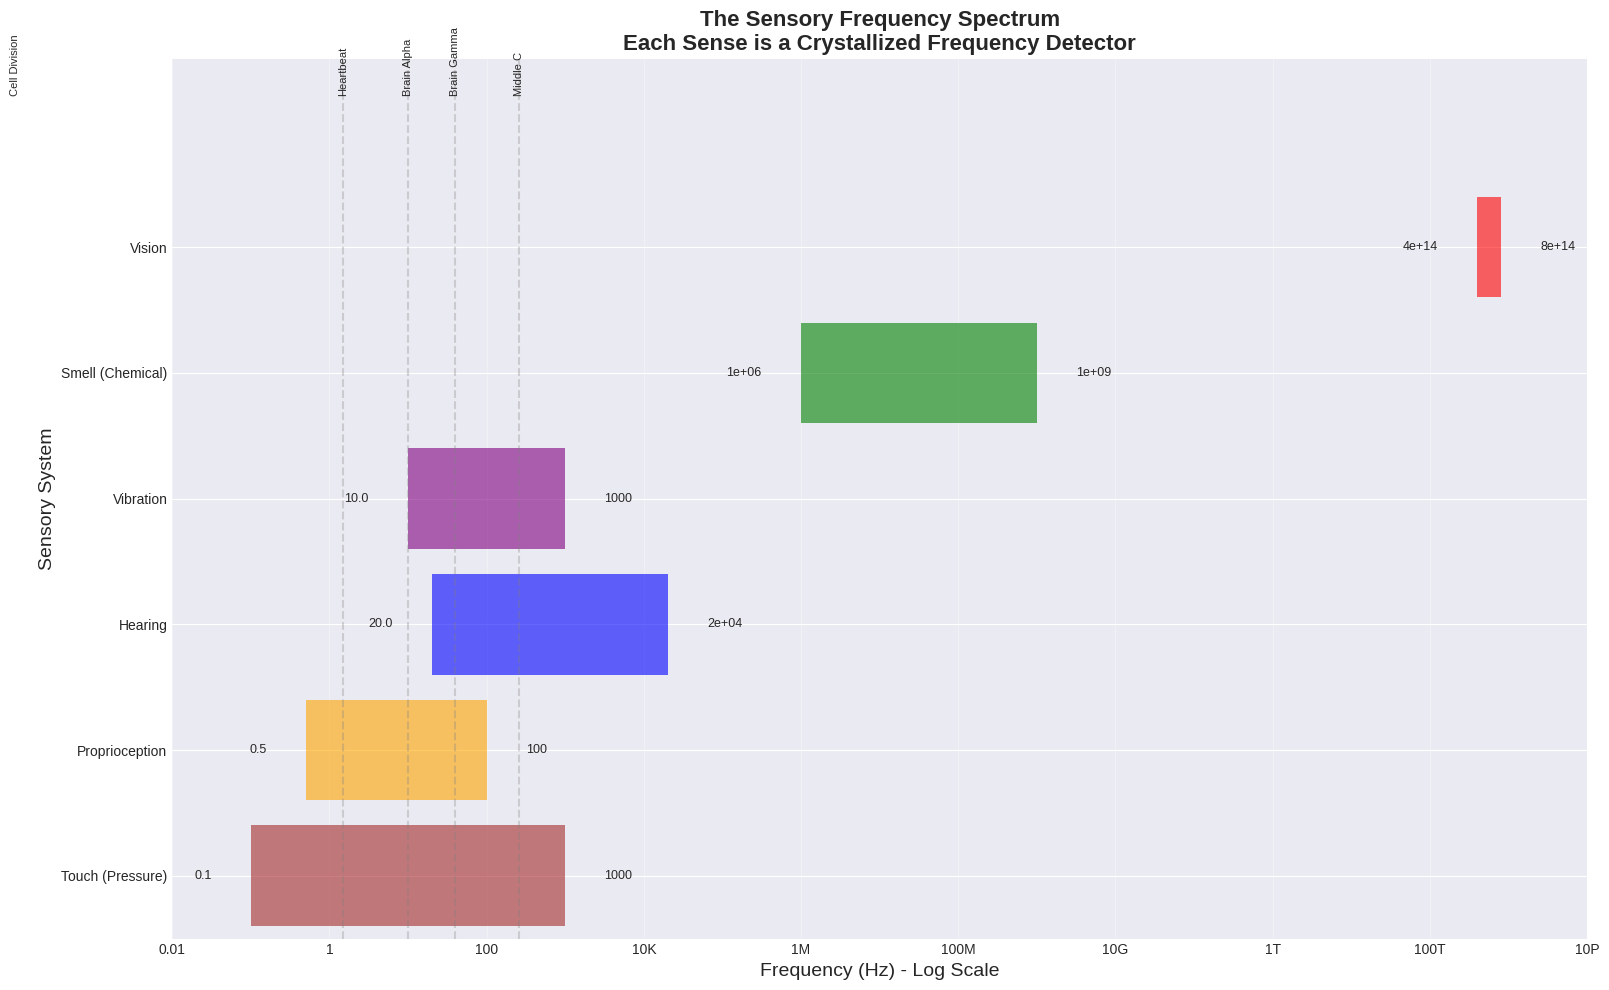


💎 REVELATION: Each sense organ is evolution's answer to detecting
specific frequency ranges in the environment!

The body is a multi-frequency detection system!


In [4]:
# Complete sensory spectrum visualization
fig, ax = plt.subplots(figsize=(16, 10))

# Frequency ranges for each sense
sensory_ranges = [
    # (name, min_freq, max_freq, color, y_position)
    ('Touch (Pressure)', 0.1, 1000, 'brown', 0),
    ('Proprioception', 0.5, 100, 'orange', 1),
    ('Hearing', 20, 20000, 'blue', 2),
    ('Vibration', 10, 1000, 'purple', 3),
    ('Smell (Chemical)', 1e6, 1e9, 'green', 4),
    ('Vision', 4e14, 8e14, 'red', 5),
]

# Plot each sensory range
for name, min_f, max_f, color, y in sensory_ranges:
    # Log scale bar
    ax.barh(y, np.log10(max_f) - np.log10(min_f), 
            left=np.log10(min_f), height=0.8, 
            color=color, alpha=0.6, label=name)
    
    # Add frequency labels
    ax.text(np.log10(min_f) - 0.5, y, 
           f'{min_f:.0e}' if min_f > 1000 else f'{min_f:.1f}',
           ha='right', va='center', fontsize=9)
    ax.text(np.log10(max_f) + 0.5, y, 
           f'{max_f:.0e}' if max_f > 1000 else f'{max_f:.0f}',
           ha='left', va='center', fontsize=9)

# Add reference lines
reference_freqs = {
    'Heartbeat': 1.5,
    'Brain Alpha': 10,
    'Brain Gamma': 40,
    'Middle C': 261.6,
    'Cell Division': 0.0001,
}

for ref_name, freq in reference_freqs.items():
    if freq < 1e15:  # Only plot if in range
        ax.axvline(np.log10(freq), color='gray', alpha=0.3, linestyle='--')
        ax.text(np.log10(freq), 6.2, ref_name, 
               rotation=90, ha='center', va='bottom', fontsize=8)

ax.set_xlim(-2, 16)
ax.set_ylim(-0.5, 6.5)
ax.set_xlabel('Frequency (Hz) - Log Scale', fontsize=14)
ax.set_ylabel('Sensory System', fontsize=14)
ax.set_title('The Sensory Frequency Spectrum\nEach Sense is a Crystallized Frequency Detector', 
            fontsize=16, fontweight='bold')

# Custom x-axis labels
x_labels = ['0.01', '1', '100', '10K', '1M', '100M', '10G', '1T', '100T', '10P']
x_positions = [-2, 0, 2, 4, 6, 8, 10, 12, 14, 16]
ax.set_xticks(x_positions[:len(x_labels)])
ax.set_xticklabels(x_labels)

ax.grid(True, alpha=0.3, axis='x')
ax.set_yticks(range(6))
ax.set_yticklabels([sr[0] for sr in sensory_ranges])

plt.tight_layout()
plt.show()

print("\n💎 REVELATION: Each sense organ is evolution's answer to detecting")
print("specific frequency ranges in the environment!")
print("\nThe body is a multi-frequency detection system!")

## 4. Developmental Timeline Integration

Watch how all sensory systems crystallize in parallel during development.

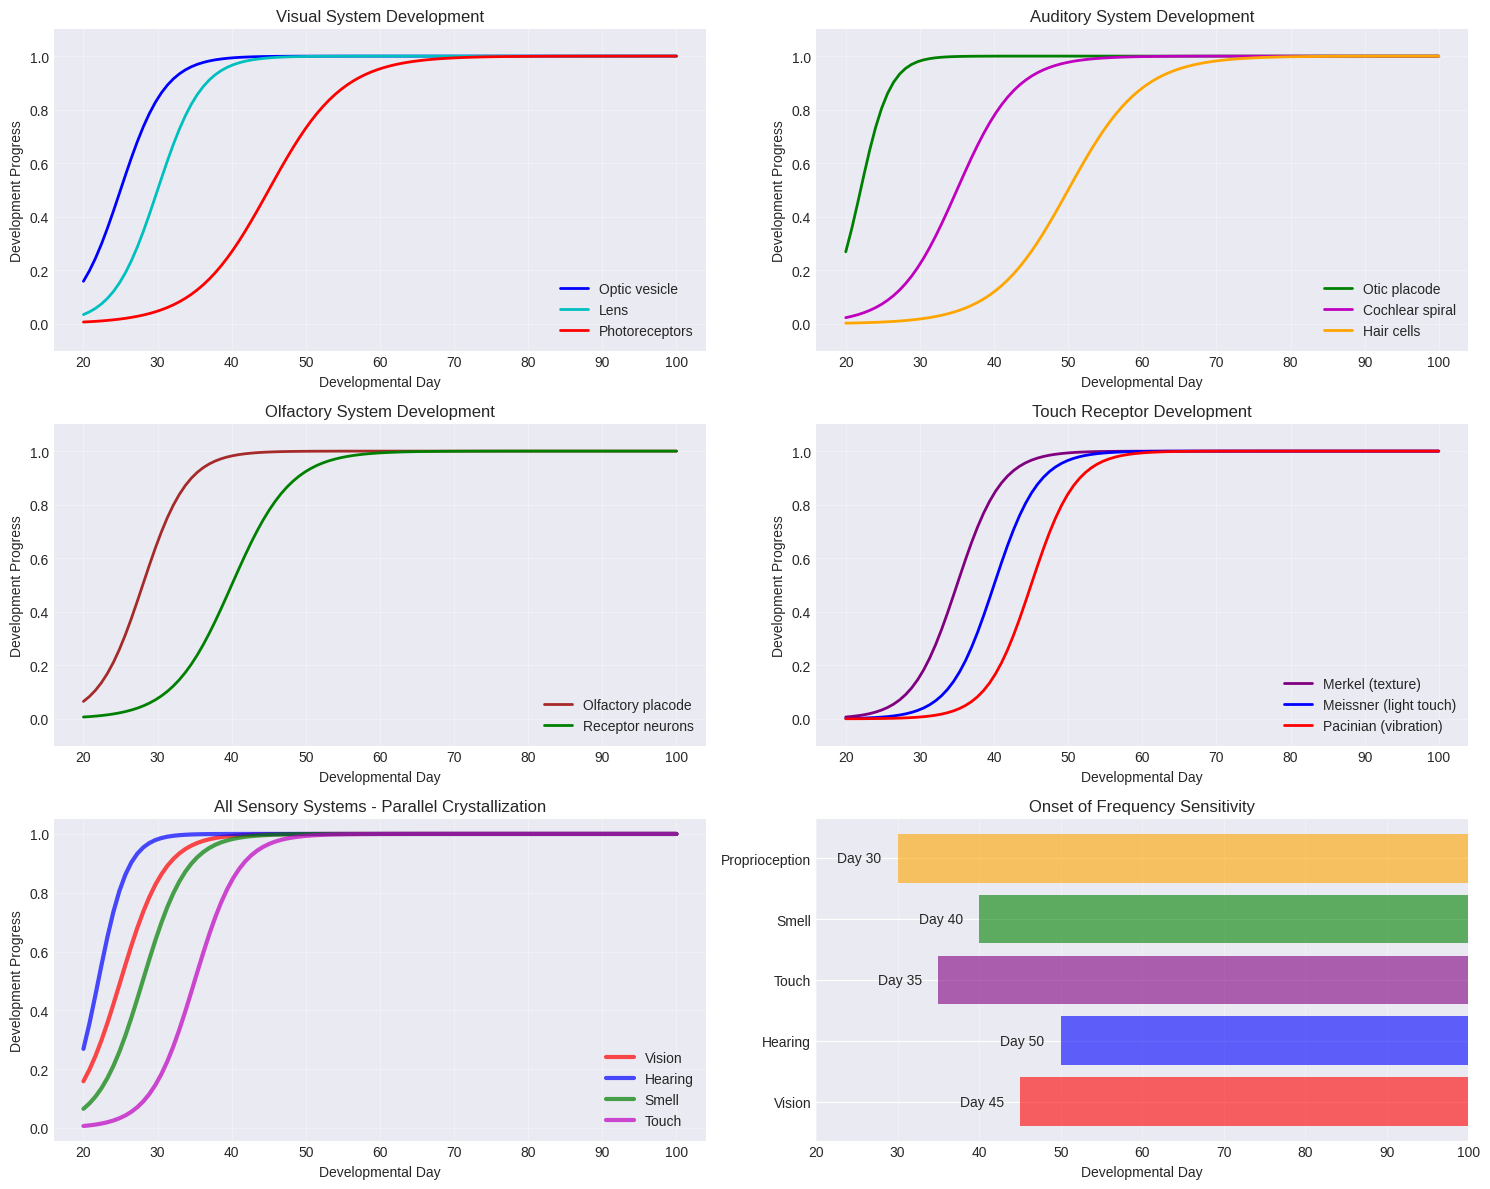


🌟 INSIGHT: All sensory systems develop in parallel,
each crystallizing as a frequency detector for its domain!

The body builds a complete spectrum analyzer!


In [5]:
# Integrated sensory development timeline
def plot_sensory_development():
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    days = np.linspace(20, 100, 100)
    
    # 1. Visual system
    ax = axes[0]
    optic_vesicle = 1 / (1 + np.exp(-(days - 25) / 3))
    lens = 1 / (1 + np.exp(-(days - 30) / 3))
    photoreceptors = 1 / (1 + np.exp(-(days - 45) / 5))
    
    ax.plot(days, optic_vesicle, 'b-', label='Optic vesicle', linewidth=2)
    ax.plot(days, lens, 'c-', label='Lens', linewidth=2)
    ax.plot(days, photoreceptors, 'r-', label='Photoreceptors', linewidth=2)
    ax.set_title('Visual System Development')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 2. Auditory system
    ax = axes[1]
    otic_placode = 1 / (1 + np.exp(-(days - 22) / 2))
    cochlea = 1 / (1 + np.exp(-(days - 35) / 4))
    hair_cells = 1 / (1 + np.exp(-(days - 50) / 5))
    
    ax.plot(days, otic_placode, 'g-', label='Otic placode', linewidth=2)
    ax.plot(days, cochlea, 'm-', label='Cochlear spiral', linewidth=2)
    ax.plot(days, hair_cells, 'orange', label='Hair cells', linewidth=2)
    ax.set_title('Auditory System Development')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 3. Olfactory system
    ax = axes[2]
    olfactory_placode = 1 / (1 + np.exp(-(days - 28) / 3))
    receptor_neurons = 1 / (1 + np.exp(-(days - 40) / 4))
    
    ax.plot(days, olfactory_placode, 'brown', label='Olfactory placode', linewidth=2)
    ax.plot(days, receptor_neurons, 'green', label='Receptor neurons', linewidth=2)
    ax.set_title('Olfactory System Development')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 4. Somatosensory
    ax = axes[3]
    merkel = 1 / (1 + np.exp(-(days - 35) / 3))
    meissner = 1 / (1 + np.exp(-(days - 40) / 3))
    pacinian = 1 / (1 + np.exp(-(days - 45) / 3))
    
    ax.plot(days, merkel, 'purple', label='Merkel (texture)', linewidth=2)
    ax.plot(days, meissner, 'blue', label='Meissner (light touch)', linewidth=2)
    ax.plot(days, pacinian, 'red', label='Pacinian (vibration)', linewidth=2)
    ax.set_title('Touch Receptor Development')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 5. Integrated view
    ax = axes[4]
    ax.plot(days, optic_vesicle, 'r-', label='Vision', linewidth=3, alpha=0.7)
    ax.plot(days, otic_placode, 'b-', label='Hearing', linewidth=3, alpha=0.7)
    ax.plot(days, olfactory_placode, 'g-', label='Smell', linewidth=3, alpha=0.7)
    ax.plot(days, merkel, 'm-', label='Touch', linewidth=3, alpha=0.7)
    
    ax.set_title('All Sensory Systems - Parallel Crystallization')
    ax.set_xlabel('Developmental Day')
    ax.set_ylabel('Development Progress')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 6. Frequency tuning emergence
    ax = axes[5]
    
    # Show when each system becomes frequency-sensitive
    systems = ['Vision', 'Hearing', 'Touch', 'Smell', 'Proprioception']
    onset_days = [45, 50, 35, 40, 30]
    colors = ['red', 'blue', 'purple', 'green', 'orange']
    
    for i, (system, onset, color) in enumerate(zip(systems, onset_days, colors)):
        ax.barh(i, 100 - onset, left=onset, color=color, alpha=0.6)
        ax.text(onset - 2, i, f'Day {onset}', ha='right', va='center')
    
    ax.set_yticks(range(len(systems)))
    ax.set_yticklabels(systems)
    ax.set_xlabel('Developmental Day')
    ax.set_title('Onset of Frequency Sensitivity')
    ax.set_xlim(20, 100)
    ax.grid(True, alpha=0.3, axis='x')
    
    # Common formatting
    for ax in axes[:4]:
        ax.set_xlabel('Developmental Day')
        ax.set_ylabel('Development Progress')
        ax.set_ylim(-0.1, 1.1)
    
    plt.tight_layout()
    plt.show()

plot_sensory_development()

print("\n🌟 INSIGHT: All sensory systems develop in parallel,")
print("each crystallizing as a frequency detector for its domain!")
print("\nThe body builds a complete spectrum analyzer!")

## Summary: Sensory Crystallization Principles

### Dr. Mordin's Key Discoveries:

1. **Each sense organ is a frequency crystal**
   - Eye: 4×10¹⁴ - 8×10¹⁴ Hz (electromagnetic)
   - Ear: 20 - 20,000 Hz (acoustic)
   - Touch: 0.1 - 1000 Hz (mechanical)
   - Smell: 10⁶ - 10⁹ Hz (molecular vibration)

2. **Development follows frequency optimization**
   - Structures crystallize to maximize frequency discrimination
   - Hexagonal photoreceptor packing
   - Logarithmic cochlear spiral
   - Distributed mechanoreceptor types

3. **Parallel development with cross-talk**
   - All senses develop simultaneously
   - Share common neural crest origins
   - Cross-modal plasticity from frequency overlap

4. **Clinical implications**
   - Sensory disorders = frequency detection failures
   - Therapy could restore frequency sensitivity
   - Cross-modal training exploits frequency relationships

*"Had to see how senses crystallize! Each one tunes to different part of universal frequency spectrum. Someone else might have thought they develop independently!"*

---

### Next: MS03 - Vascular Fractal Networks 🌳